In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
from scipy.signal import argrelextrema
from scipy import integrate as intg
from scipy.misc import derivative



In [2]:
import glob
data_array=[]

for ifile in glob.iglob('dataset_example_ITA/Time_series/Simulation_*.csv'):
    print(ifile)
    df = pd.read_csv(ifile)
    df.drop(columns=df.columns[0], axis=1,  inplace=True)

  #  df = df.drop('Time', axis=1)
    
    data_array.append(df)

dataset_example_ITA/Time_series\Simulation_1.csv
dataset_example_ITA/Time_series\Simulation_2.csv


In [3]:
df_dmg_sim = pd.read_csv('dataset_example_ITA/Damage_simulations.csv')
df_dmg_sim

,Simulation_ID,Dmg_coord_x,Dmg_coord_y,Dmg_coord_z,Dmg_size,Dmg_orient_x,Dmg_orient_y,Dmg_orient_z,Dmg_type
0,1,0,0.35,0,0.00,0,0,0,delamination
1,2,0,0.35,0,0.15,0,0,0,delamination


In [4]:
dmg_x           = df_dmg_sim.iloc[:,1]
dmg_y           = df_dmg_sim.iloc[:,2]
dmg_z           = df_dmg_sim.iloc[:,3]
dmg_size        = df_dmg_sim.iloc[:,4]
dmg_orient_x    = df_dmg_sim.iloc[:,5]
dmg_orient_y    = df_dmg_sim.iloc[:,6]
dmg_orient_z    = df_dmg_sim.iloc[:,7]
dmg_orient_type = df_dmg_sim.iloc[:,8]





In [5]:
df_sensor_loc = pd.read_csv('dataset_example_ITA/Sensor_locations.csv')
df_sensor_loc

,Sensor_ID,X,Y,Z
0,Sensor_1,0,0.1,0.005
1,Sensor_2,0,0.6,0.005
2,Sensor_3,0,0.1,-0.010
3,Sensor_4,0,0.6,-0.010


In [6]:
sensor_1 = []
sensor_2 = []
sensor_3 = []
sensor_4 = []

sensor_1.append(df_sensor_loc.at[0, 'X'])
sensor_1.append(df_sensor_loc.at[0, 'Y'])
sensor_1.append(df_sensor_loc.at[0, 'Z'])

sensor_2.append(df_sensor_loc.at[1, 'X'])
sensor_2.append(df_sensor_loc.at[1, 'Y'])
sensor_2.append(df_sensor_loc.at[1, 'Z'])

sensor_3.append(df_sensor_loc.at[2, 'X'])
sensor_3.append(df_sensor_loc.at[2, 'Y'])
sensor_3.append(df_sensor_loc.at[2, 'Z'])

sensor_4.append(df_sensor_loc.at[3, 'X'])
sensor_4.append(df_sensor_loc.at[3, 'Y'])
sensor_4.append(df_sensor_loc.at[3, 'Z'])

sensor_1, sensor_2, sensor_3,sensor_4

([0, 0.1, 0.005], [0, 0.6, 0.005], [0, 0.1, -0.01], [0, 0.6, -0.01])

In [7]:
time = []
sensors = []

for df in data_array:
    time.append(df.iloc[:,0].values)
    sensors_df = []

    for i in range(1, 5):
        sensors_df.append(df.iloc[:,i])

    sensors.append(sensors_df)




In [8]:
print(np.shape(sensors))
print(len(sensors[0]))

(2, 4, 501)
4


In [9]:
def rebin_arrays(x, y , bins):

    x_binned = []
    y_binned = []

    for i in range(0, bins):
    
        step = int(len(y)/bins)
        #print(step)
        y_mean = 0
        x_mean = 0
        for k in range(i*step, step*(i+1)):
            y_mean = y_mean + y[k]
            x_mean = x_mean + x[k]

        y_binned.append(y_mean/step)
        x_binned.append(x_mean/step)

    return np.array(x_binned), np.array(y_binned)

In [10]:
def multiplyList( listOfnumbers, multiplier ):
    output_list = []
    for i in range(0,len(listOfnumbers)):
        output_list.append(listOfnumbers[i]*multiplier)

    return output_list

In [72]:
type(time)

list

In [11]:
time = multiplyList(time, 1000)


#Draw the signal outputs

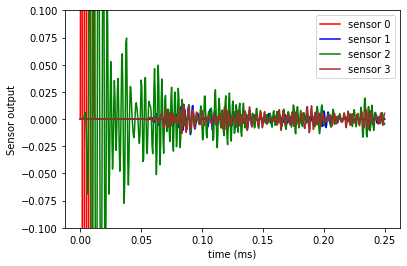

In [17]:
sim_ID = 0 #simulation_ID
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('time (ms)') 
ax1.set_ylabel('Sensor output') 
#plt.yscale('log')
ax1.set_ylim(-0.1, 0.1)
#ax1.set_xlim(0, 0.05)
#ax1.set_xlim(0, 0.0001)

plt.plot(time[sim_ID], sensors[sim_ID][0], color = 'red' ,      label='sensor 0') 
plt.plot(time[sim_ID], sensors[sim_ID][1], color = 'blue' ,     label='sensor 1') 
plt.plot(time[sim_ID], sensors[sim_ID][2], color = 'green' ,    label='sensor 2') 
plt.plot(time[sim_ID], sensors[sim_ID][3], color = 'brown' ,    label='sensor 3') 

plt.legend()
plt.savefig('dataset_example_ITA/plots/Sensor_output_simID_0_zoom.png')

Draw the sensor and the simulated dmg location

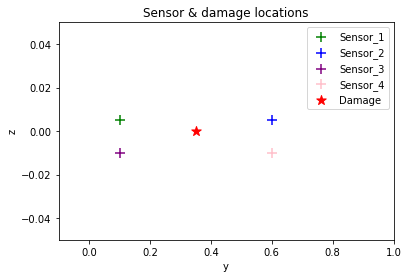

In [19]:
sim_ID = 0 #simulation_ID

fig, ax1 = plt.subplots() 

ax1.set_xlabel('y') 
ax1.set_ylabel('z') 
plt.title('Sensor & damage locations')
#plt.yscale('log')
#ax1.set_ylim(0.00001, 15)
ax1.set_xlim(-0.1, 1)
ax1.set_ylim(-0.05, 0.05)
plt.scatter(sensor_1[1], sensor_1[2], color="green"   , label='Sensor_1', marker = "+",s=100) # plotting single point
plt.scatter(sensor_2[1], sensor_2[2], color="blue"  , label='Sensor_2', marker = "+",s=100) # plotting single point
plt.scatter(sensor_3[1], sensor_3[2], color="purple", label='Sensor_3', marker = "+",s=100) # plotting single point
plt.scatter(sensor_4[1], sensor_4[2], color="pink"  , label='Sensor_4', marker = "+",s=100) # plotting single point
plt.scatter(dmg_y[sim_ID], dmg_z[sim_ID], color="red"  , label='Damage', marker = "*",s=100) # plotting single point

plt.legend()
plt.savefig('dataset_example_ITA/plots/Sensor_and_damage_locations.png')

In [145]:
len(time[0])

501

#https://towardsdatascience.com/feature-engineering-on-time-series-data-transforming-signal-data-of-a-smartphone-accelerometer-for-72cbe34b8a60

Take the FFT (FAST FOURIE transform of the signals. Apply feature extraction on the FFT's.)

In [29]:
from scipy.fft import fft, fftfreq

def get_FFT_transform( input, duration, N_points ):

    sample_rate = float(N_points / duration)

    yf = fft(input) # this is a complex number. We plot its absolute value (length).
    xf = fftfreq(N_points, 1 / sample_rate)

    #now we sort xf in increasing order and apply the same ordering on yf.
    sorted_xf = np.sort(xf)
    #np.argsort(xf)
    sorted_yf = yf[np.argsort(xf)]

    return sorted_xf, sorted_yf


In [30]:
duration = time[0][len(time[0])-1]-time[0][0]
N_points = len(time[0])

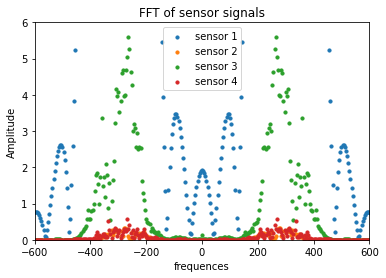

<Figure size 432x288 with 0 Axes>

In [46]:
sim_ID = 0 #simulation_ID
Sensor_number = 2 


xf_1, yf_1 = get_FFT_transform(np.array(sensors[sim_ID][0]), duration, N_points )
xf_2, yf_2 = get_FFT_transform(np.array(sensors[sim_ID][1]), duration, N_points )
xf_3, yf_3 = get_FFT_transform(np.array(sensors[sim_ID][2]), duration, N_points )
xf_4, yf_4 = get_FFT_transform(np.array(sensors[sim_ID][3]), duration, N_points )


fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('frequences') 
ax1.set_ylabel('Amplitude') 
#plt.yscale('log')
ax1.set_xlim(-600, 600)
#ax1.set_ylim(0.00005, 1000) #for logscale
ax1.set_ylim(0, 6) 

plt.title('FFT of sensor signals')
plt.scatter(xf_1, np.abs(yf_1),marker='o', s=10,label='sensor 1')
plt.scatter(xf_2, np.abs(yf_2),marker='o', s=10, label='sensor 2')
plt.scatter(xf_3, np.abs(yf_3),marker='o', s=10, label='sensor 3')
plt.scatter(xf_4, np.abs(yf_4),marker='o', s=10, label='sensor 4')

plt.legend()

plt.show()
#plt.savefig('dataset_example_ITA/plots/Sensor_signal_FFT_logscale.png')
plt.savefig('dataset_example_ITA/plots/Sensor_signal_FFT.png')



#Rebinning of FFT transformations. Could lead to loss of information

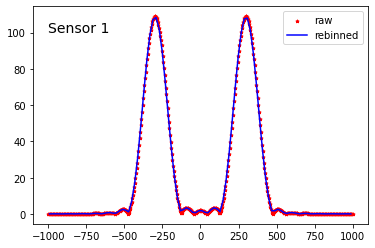

In [52]:
rebinned_xf_1, rebinned_yf_1 = rebin_arrays(xf_1, np.abs(yf_1),100)
#plt.scatter(rebinned_xf, rebinned_yf,marker='o', s=10)
#plt.plot(sorted_xf, np.abs(sorted_yf), color='red')

plt.scatter(xf_1, np.abs(yf_1) ,marker='*', color='red', s=10, label= 'raw')
plt.plot(rebinned_xf_1, rebinned_yf_1, color='blue', label = 'rebinned' )
plt.text(-1000, 100, 'Sensor 1', fontsize = 14)
plt.legend()
plt.savefig('dataset_example_ITA/plots/Rebin_FFT_sensor_1.png')


